# UltraLeap import playground

Notebook status 20.09.2022

In [1]:
# Import public packages and functions
import os
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from itertools import compress
from scipy.spatial import distance
#from scipy import signal
from scipy.ndimage import uniform_filter1d
import math
from scipy.signal import find_peaks
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# import statsmodels.api as sm


In [2]:
# Import own functions
import import_data.import_unity_positions as import_unity
import import_data.import_and_convert_data as import_dat

# import sig_processing.select_data as select_data

import movement_calc.calc_3d_distances as calc_3d
import movement_calc.helpfunctions as hp



### Function that iterates over subject files

In [3]:
def show_sub_files(
    sub: str,
    cam_pos: list,
    rec_moment = None,  # consider to select on moment (12mfu etc)
    state = None,  # consider to select med-stim state
    ):

    """
    doc-string with explanation
    """
    data_path, _ = import_dat.find_onedrive_path()
    
    # sub_folder = 'navigate to sub-specific folder'

    sub_folder = os.path.join(data_path,f'Percept_sub{sub}')
    print(sub_folder)
    print(os.listdir(sub_folder))
#     data_folders = []
#     # integrate somewhere
#     if state != None:
#         # navigate to state-specific folder or files
#         state_folder = os.path.join(onedrive_data_path,)
        
#         for cam in cam_pos:
#             data_folders.append(find specific folder for sub and cam combi)

#     all_files = []
#     for f in data_folders:
#         files = os.listdir(f)
#         all_files.extend(files)  # why extend and not append?
#     # you can select here on only csv files, or only the files from left or right hand
#     return all_files

# cam_pos = ['VR','desktop','Screentop']

# show_sub_files(
#     'Percept_sub030',
#     cam_pos,
#     '12mfu')

In [4]:
sub_files = show_sub_files(
    '029',
    ['VR','desktop'],
    rec_moment = None,  # consider to select on moment (12mfu etc)
    state = None,  # consider to select med-stim state
    )

sub_files

c:\Users\madal\OneDrive - Charité - Universitätsmedizin Berlin\Ultraleap-hand-tracking\data\Patientdata\Percept_sub029
['12mfu']


### Define Data directories and Find files in directories

In [5]:
importlib.reload(import_dat)

# Find common relative path and directory structure
proj_dir = import_unity.find_project_dir(os.getcwd())


### VR Position

In [6]:
data_dir1 = os.path.join(proj_dir, 'code\\ultraleap-hand-tracking\\unity\\builds\\VR\\ultraleap_hand_tracking_Data\\log_files\\Patientdata\\Percept_sub030\\12mfu\\VR')
files1 = os.listdir(os.path.join(data_dir1,'sub030_12mfu_M1S0_VR_fingertapping'))

for f in files1:

    if 'lh' in f:

        df1 = import_dat.import_string_data(
            file_path=os.path.join(data_dir1, 'sub030_12mfu_M1S0_VR_fingertapping', f)
        )

# cleaned_df1 = remove_double_and_onlyNan_rows(df1)

cleaned_df11 = import_dat.remove_double_and_onlyNan_rows(df1)

# Exluding the first values
cleaned_df1 = cleaned_df11[cleaned_df11['program_time']>=105]

### Desktop Position

In [7]:
data_dir2 = os.path.join(proj_dir, 'code\\ultraleap-hand-tracking\\unity\\builds\\desktop\\ultraleap_hand_tracking_Data\\log_files\\Patientdata\\Percept_sub030\\12mfu\\desktop')
files2 = os.listdir(os.path.join(data_dir2,'sub030_12mfu_M1S1_desktop_fingertapping'))

for f in files2:

    if 'rh' in f:

        df2 = import_dat.import_string_data(
            file_path=os.path.join(data_dir2, 'sub030_12mfu_M1S1_desktop_fingertapping', f)
        )

cleaned_df2 = import_dat.remove_double_and_onlyNan_rows(df2)


### Screentop Position

In [8]:
data_dir3 = os.path.join(proj_dir, 'code\\ultraleap-hand-tracking\\unity\\builds\\screentop\\ultraleap_hand_tracking_Data\\log_files')
files3 = os.listdir(os.path.join(data_dir3,'29_09_2022_11_10_41_5x_OC_down'))

for f in files3:

    if 'lh' in f:

        df3 = import_dat.import_string_data(
            file_path=os.path.join(data_dir3, '29_09_2022_11_10_41_5x_OC_down', f)
        )


cleaned_df3 = import_dat.remove_double_and_onlyNan_rows(df3)

### Calculating FT amplitude

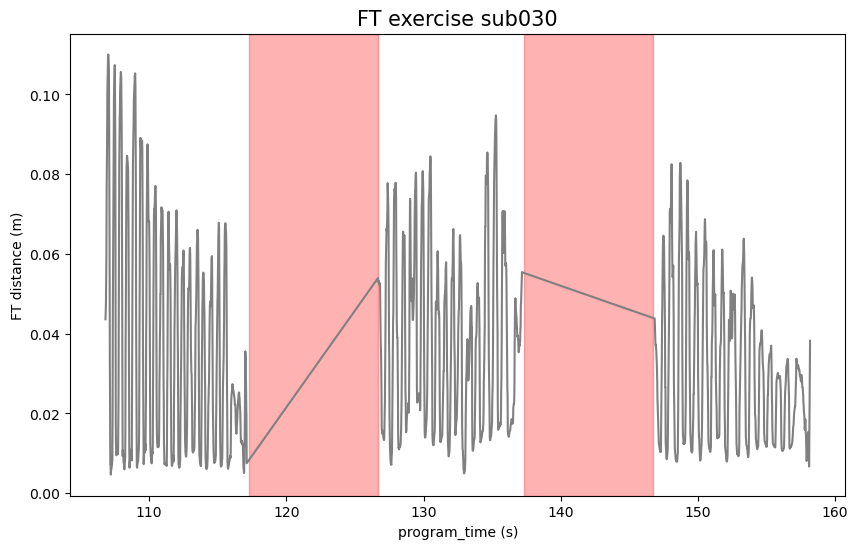

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

FT_amp_VR = hp.FT_amp(
    cleaned_df1, 'index_tip', 'thumb_tip'
)
ax.plot(FT_amp_VR['program_time'],FT_amp_VR['distance'],color='grey')#,label='VR')
 
# adjust labels
ax.set_ylabel("FT distance (m)")
ax.set_xlabel("program_time (s)") 

# assign title
ax.set_title("FT exercise sub030", size=15)
 
# highlight a time range
ax.axvspan(117.3, 126.7, color="red", alpha=0.3)
ax.axvspan(137.3, 146.7, color="red", alpha=0.3)

# Regression line
# reg = np.polyfit(cleaned_df1,cleaned_df1['program_time'],deg=1)

# x = cleaned_df1['program_time']
# y = cleaned_df1['program_time'][1] + cleaned_df1['program_time'][0] * x
# plt.plot(x, y, '--')

plt.show()

### Dataframes w/ ROIs

In [10]:
importlib.reload(hp)

<module 'movement_calc.helpfunctions' from 'c:\\Users\\madal\\Thesis\\code\\ultraleap-hand-tracking\\py_analysis\\preprocessing\\movement_calc\\helpfunctions.py'>

In [11]:
FT1_VR = hp.block_extraction(FT_amp_VR,0.04)[0]
FT2_VR = hp.block_extraction(FT_amp_VR,0.04)[1]
FT3_VR = hp.block_extraction(FT_amp_VR,0.04)[2]
FT1_VR

,program_time,distance
0,106.8100,0.043594
1,106.8266,0.046463
2,106.8437,0.048076
3,106.8608,0.054401
4,106.8760,0.059696
...,...,...
610,117.0218,0.034513
611,117.0393,0.033235
612,117.0559,0.027074
613,117.0723,0.022733


### Maximum Amplitude 

In [12]:
# max_amp = np.max(FT_amp_VR['amplitude'])
max_amp1 = np.max(FT1_VR['distance'])
max_amp2 = np.max(FT2_VR['distance'])
max_amp3 = np.max(FT3_VR['distance'])

mean_amp1 = np.mean(FT1_VR['distance'])
mean_amp2 = np.mean(FT2_VR['distance'])
mean_amp3 = np.mean(FT3_VR['distance'])

# print(max_amp)
print(f'Maximum distance FT1: {max_amp1}')
print(f'Mean distance FT1: {mean_amp1}')
print(f'Maximum distance FT1: {max_amp2}')
print(f'Mean distance FT1: {mean_amp2}')
print(f'Maximum distance FT1: {max_amp3}')
print(f'Mean distance FT1: {mean_amp3}')

Maximum distance FT1: 0.10998936312207648
Mean distance FT1: 0.03717250087978543
Maximum distance FT1: 0.09475304744439621
Mean distance FT1: 0.038270739478914614
Maximum distance FT1: 0.08283682755876157
Mean distance FT1: 0.03048462239951138


### Function that calculates minima and maxima using find_peaks()

In [13]:
importlib.reload(hp)
dict_min_max_FT1 = hp.find_min_max(
    FT1_VR,
    15,
    15,
    'distance',
    # 0.02,
    # 5
    )  # distmin = 15; distmax = 15 
max_FT1_idx_VR = dict_min_max_FT1['max_idx'] 
min_FT1_idx_VR = dict_min_max_FT1['min_idx']



In [14]:
# zeropasses = []
# for i in np.arange(len(np.diff(FT1_VR['amplitude'])) - 1):

#     prod = np.diff(FT1_VR['amplitude'])[i] * np.diff(FT1_VR['amplitude'])[i + 1]
        
#     if prod <= 0:
#         zeropasses.append(i)
# # zeropasses

# peaks = []
# for p in np.arange(0, len(zeropasses)-1):
#     dif = FT1_VR.iloc[zeropasses[p+1]]['amplitude']-FT1_VR.iloc[zeropasses[p]]['amplitude']
#     print(dif)
#     if dif < 0.08:
#         peaks.append(zeropasses[p])

# plt.scatter(FT1_VR.iloc[peaks]['program_time'], FT1_VR.iloc[peaks]['amplitude'], color = 'red')
# plt.plot(FT1_VR['program_time'], FT1_VR['amplitude'], color = 'grey')

In [15]:
dict_min_max_FT2 = hp.find_min_max(
    FT2_VR,
    18,
    18,
    'distance',
    # 0.02,
    # 5
    )
max_FT2_idx_VR = dict_min_max_FT2['max_idx'] 
min_FT2_idx_VR = dict_min_max_FT2['min_idx']

In [16]:
dict_min_max_FT3 = hp.find_min_max(
    FT3_VR, 
    20, 
    20,
    'distance'
    )
max_FT3_idx_VR = dict_min_max_FT3['max_idx'] 
min_FT3_idx_VR = dict_min_max_FT3['min_idx']

### Function that calculates Speed of Movement

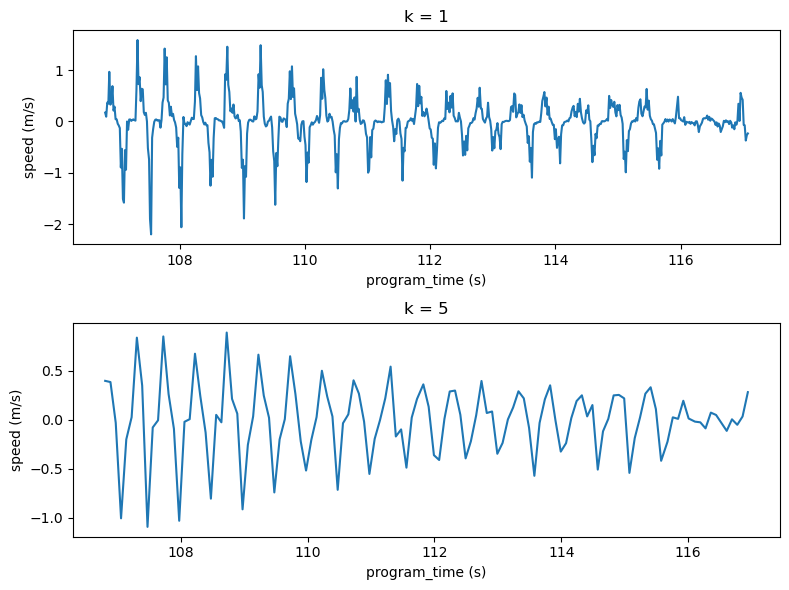

In [17]:
importlib.reload(hp)

list_cutoff = [1,5]

fig,axes = plt.subplots(len(list_cutoff), 1, figsize=(8, 3*len(list_cutoff)))

for idx,cutoff in enumerate(list_cutoff):
    speed1 = hp.speed_total(FT1_VR,cutoff)

    axes[idx].plot(FT1_VR[:-cutoff]['program_time'][::cutoff],speed1)
    axes[idx].set_title(f'k = {cutoff}')
    axes[idx].set_ylabel('speed (m/s)')
    axes[idx].set_xlabel('program_time (s)')
    # axes[idx].set_ylim(min(speed_1),max(speed_1))
plt.tight_layout()
plt.show()

### Function that calculates tapping speed

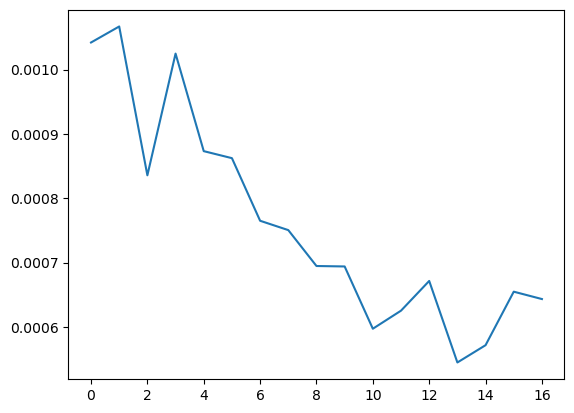

In [18]:
dict_speedOC_FT1_VR = hp.speed_OC_time_series(FT1_VR, max_FT1_idx_VR, min_FT1_idx_VR)
dict_speedOC_FT2_VR = hp.speed_OC_time_series(FT2_VR, max_FT2_idx_VR, min_FT2_idx_VR)
dict_speedOC_FT3_VR = hp.speed_OC_time_series(FT3_VR, max_FT3_idx_VR, min_FT3_idx_VR)

plt.plot(
    dict_speedOC_FT1_VR['opening speed'])

### Function that calculates speed per tap - NEW

In [19]:
def speed_freq_amp_tap(df_time_amp, max_idx, min_idx):

    freq_per_tap = []
    speed_per_tap = []
    amp_per_tap = []
    time_ls = []

    for i, (max, min) in enumerate(zip(max_idx, min_idx[:-1])):

        min_time1 = df_time_amp.iloc[min_idx[i]]['program_time']
        min_time2 = df_time_amp.iloc[min_idx[i+1]]['program_time']
        min_amp1 = df_time_amp.iloc[min]['inv_distance']
        min_amp2 = df_time_amp.iloc[min_idx[i+1]]['inv_distance']

        sel_max = [m for m in max_idx if np.logical_and(m < min_idx[i+1], m > min_idx[i])]

        if len(sel_max) == 0: continue
    
        max_i = sel_max[0]
        max_amp = df_time_amp.iloc[max_i]['distance']

        delta_time = min_time2-min_time1

        vel_tap = (2*max_amp)/delta_time
        freq = 1/delta_time

        freq_per_tap.append(freq)
        speed_per_tap.append(vel_tap)
        amp_per_tap.append(max_amp)
        time_ls.append(min_time2)
        # time_ls.append(delta_time)
    
    fig,axes = plt.subplots(
        3,
        1,
        figsize=(8, 8)
    )

    axes[0].plot(time_ls, amp_per_tap)
    axes[0].set_title('dist_per_tap')
    axes[0].set_xlabel('time closing (s)')
    axes[0].set_ylabel('dist (m)')

    axes[1].plot(time_ls,speed_per_tap)
    axes[1].set_title('speed_per_tap')
    axes[1].set_xlabel('time closing (s)')
    axes[1].set_ylabel('speed (m/s)')

    axes[2].plot(time_ls,freq_per_tap)
    axes[2].set_title('freq_per_tap')
    axes[2].set_xlabel('time closing (s)')
    axes[2].set_ylabel('freq (tap/s)')

    linear_model_amp = np.polyfit(time_ls, amp_per_tap, 1)
    linear_model_fn_amp = np.poly1d(linear_model_amp)

    axes[0].plot(
        time_ls,
        linear_model_fn_amp(time_ls),
        label = f'y = {linear_model_fn_amp}'
        )

    linear_model_speed = np.polyfit(time_ls, speed_per_tap, 1)
    linear_model_fn_speed = np.poly1d(linear_model_speed)

    axes[1].plot(
        time_ls,
        linear_model_fn_speed(time_ls),
        label = f'y = {linear_model_fn_speed}'
        )
    
    linear_model_freq = np.polyfit(time_ls, freq_per_tap, 1)
    linear_model_fn_freq = np.poly1d(linear_model_freq)

    axes[2].plot(
        time_ls,
        linear_model_fn_freq(time_ls),
        label = f'y = {linear_model_fn_freq}'
        )
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()
    plt.tight_layout()
    
    return 

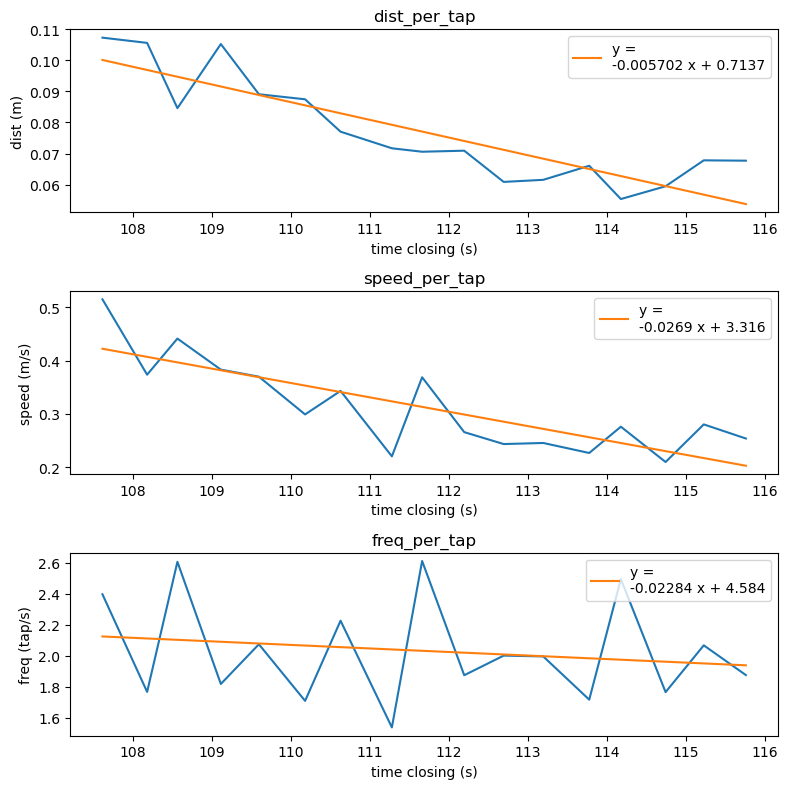

In [20]:
speed_freq_amp_tap(FT1_VR, max_FT1_idx_VR, min_FT1_idx_VR)

### Function that calculates speed per tap

In [21]:
def speed_per_tap(df_time_amp, max_idx, min_idx):

    # Speed per tap = Speed per closing
    speed_per_tap = []
    counter = 0
    counter_ls = []

    for i,(max,min) in enumerate(zip(max_idx[:-1], min_idx)):

        max_time = df_time_amp.iloc[max]['program_time']
        max_amp = df_time_amp.iloc[max]['distance']
        min_time1 = df_time_amp.iloc[min]['program_time']
        min_time2 = df_time_amp.iloc[min_idx[i+1]]['program_time']

        min_amp = df_time_amp.iloc[min]['inv_distance']

        sel_max = [m for m in max_idx if np.logical_and(m < min_idx[i+1], m > min_idx[i])]

        if len(sel_max) == 0: continue
    
        max_i = sel_max[0]
        max_amp = df_time_amp.iloc[max_i]['distance']

        speed_amp = 2*max_amp
        speed_time = min_time2-min_time1

        vel_C = speed_amp/speed_time
        speed_per_tap.append(vel_C)

        counter += 1
        counter_ls.append(counter)
    

    plt.scatter(counter_ls, speed_per_tap)
    plt.xlabel('tap')
    plt.ylabel('speed (m/s)')
    plt.title('Speed per Tap')

    print(f'# tap: {counter_ls}')

    return speed_per_tap

### Speed per tap (min to min+1)

# tap: 19


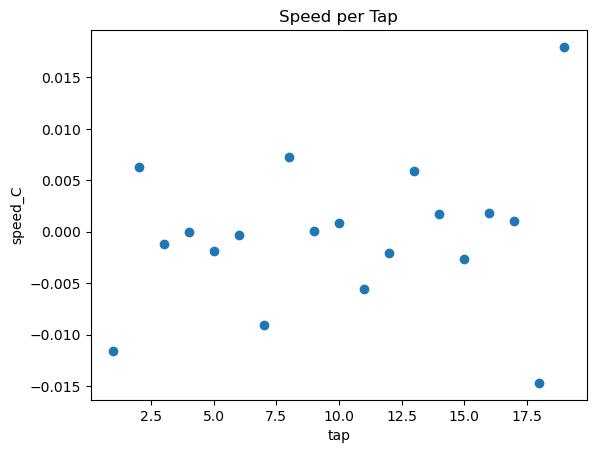

In [22]:
importlib.reload(hp)
speed_per_tap_FT1_ = hp.speed_tap(FT1_VR, min_FT1_idx_VR)

# tap: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


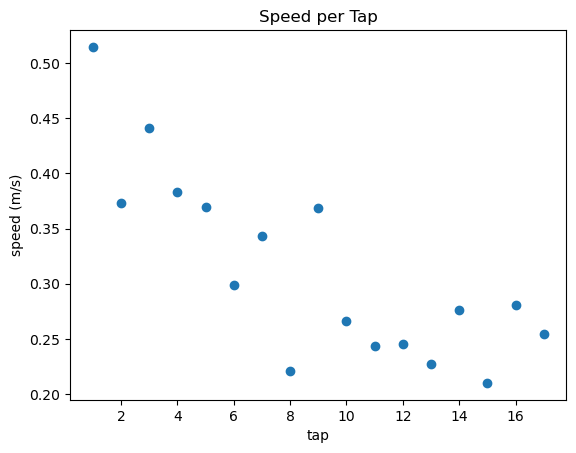

In [23]:
speed_per_tap_FT1 = speed_per_tap(FT1_VR, max_FT1_idx_VR, min_FT1_idx_VR)

# tap: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


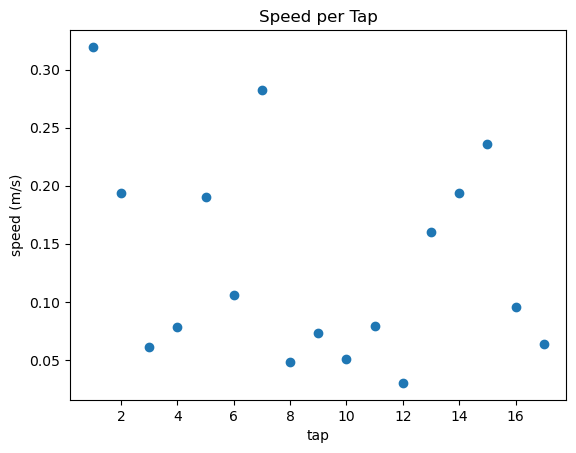

In [24]:
speed_per_tap_FT2 = speed_per_tap(FT2_VR, max_FT1_idx_VR, min_FT1_idx_VR)

# tap: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


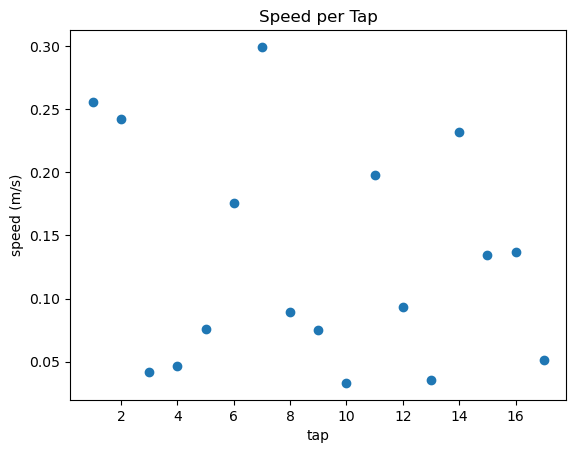

In [25]:
speed_per_tap_FT3 = speed_per_tap(FT3_VR, max_FT1_idx_VR, min_FT1_idx_VR)

### Regression Line function

In [26]:
def reg_line(df, max_idx):

    x_axis = df.iloc[max_idx]['program_time']
    y_axis = df.iloc[max_idx]['distance']
    n = np.size(x_axis)
    
    x_mean = np.mean(x_axis)
    y_mean = np.mean(y_axis)
    x_mean,y_mean
    
    Sxy = np.sum(x_axis*y_axis)- n*x_mean*y_mean
    Sxx = np.sum(x_axis*x_axis)-n*x_mean*x_mean
    
    b1 = Sxy/Sxx
    b0 = y_mean-b1*x_mean
    print('slope b1 is', b1)
    print('intercept b0 is', b0)
    
    plt.scatter(x_axis, y_axis)
    plt.xlabel('Independent variable X')
    plt.ylabel('Dependent variable y')

    y_pred = b1 * x_axis + b0
    
    plt.plot(df['program_time'], df['distance'], color = 'grey', label = f'y = {round(b1, 7)} + {round(b0, 7)}')
    plt.plot(x_axis, y_pred, color = 'red')
    plt.xlabel('program_time (s)')
    plt.ylabel('distance (m)')

    plt.legend()

    return

slope b1 is -0.005931611088601245
intercept b0 is 0.738482302043818


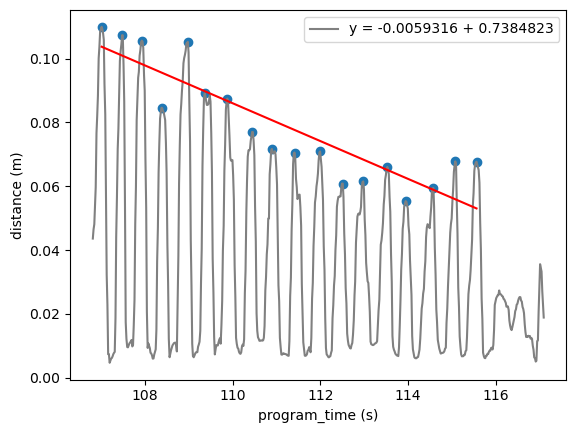

In [27]:
reg_FT1 = reg_line(FT1_VR, max_FT1_idx_VR)

slope b1 is -0.0008525674976324757
intercept b0 is 0.18068996224887524


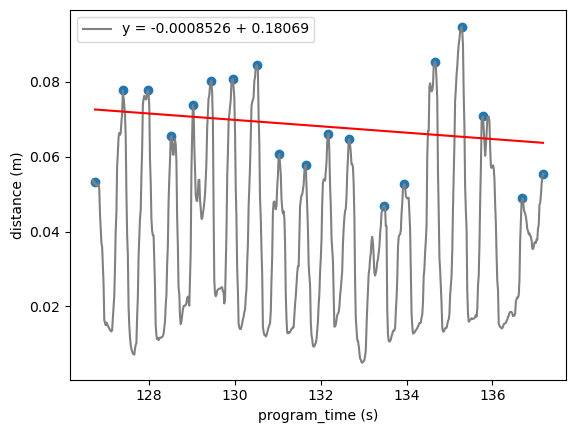

In [28]:
reg_FT2 = reg_line(FT2_VR, max_FT2_idx_VR)

slope b1 is -0.0035061266369538968
intercept b0 is 0.5891330027906807


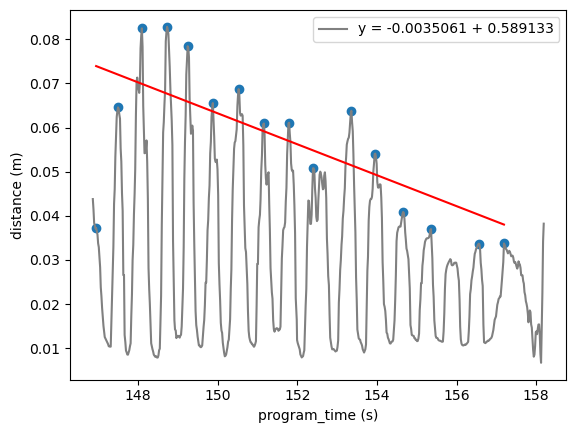

In [29]:
reg_FT3 = reg_line(FT3_VR, max_FT3_idx_VR)

### Regression line - FT1_VR

In [30]:
def detrending(df,max_idx):

    plt.plot(
        df['program_time'],
        df['distance'],
        color = 'grey'
        )
    plt.plot(
        df.iloc[max_idx]['program_time'],
        df.iloc[max_idx]['distance'],
        color = 'red'
        )
    
    plt.xlabel('program_time (s)')
    plt.ylabel('distance (m)')
    return


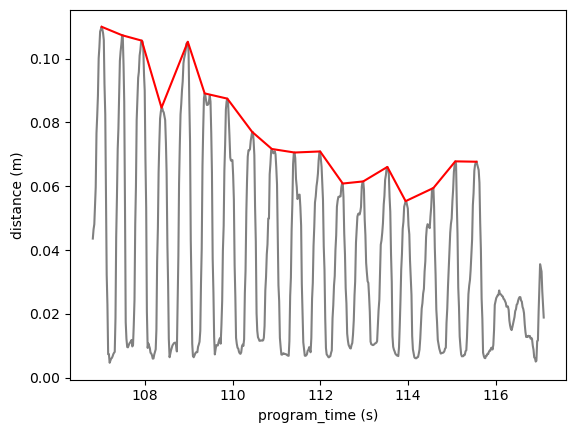

In [31]:
detrend_FT1 = detrending(
    FT1_VR,
    max_FT1_idx_VR
    )

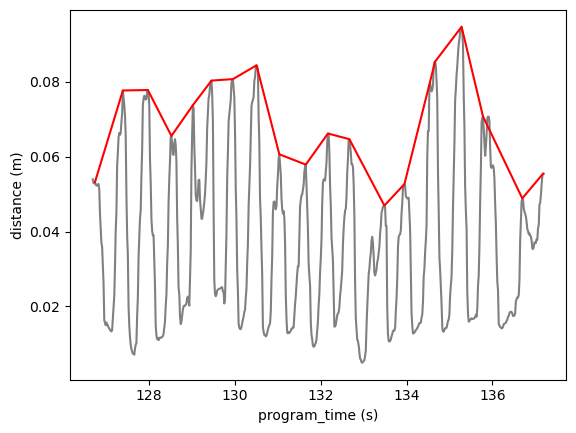

In [32]:
detrend_FT2 = detrending(
    FT2_VR,
    max_FT2_idx_VR
    )



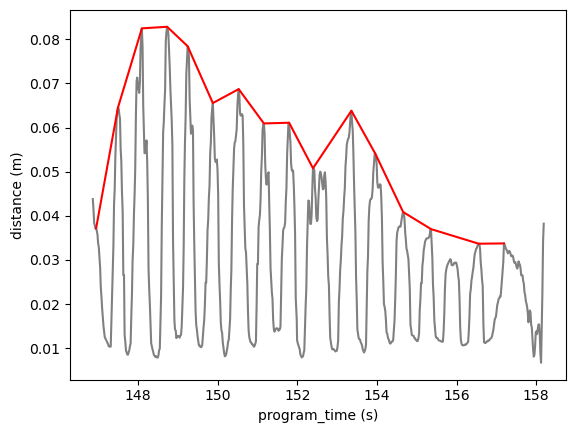

In [33]:
detrend_FT3 = detrending(
    FT3_VR,
    max_FT3_idx_VR
    )

### Decrement between consecutive maxima

In [34]:
def decrement(df_time_amp, max_idx):

    # Speed per tap = Speed per closing
    decrement = []

    for i, max in enumerate(max_idx[:-1]):

        max_amp1 = df_time_amp.iloc[max]['distance']

        max_amp2 = df_time_amp.iloc[max_idx[i+1]]['distance']

        # delta_max = max_amp2-max_amp1
        delta_max = (max_amp2-max_amp1)/max_amp1

        decrement.append(delta_max*100)
    print(decrement)
    return decrement

    

In [35]:
decrement_FT1 = decrement(FT1_VR, max_FT1_idx_VR)
decrement_FT2 = decrement(FT2_VR, max_FT2_idx_VR)
decrement_FT3 = decrement(FT3_VR, max_FT3_idx_VR)
Ft1_mean = np.mean(decrement_FT1)
print(f'Ft1_mean: {Ft1_mean}')
Ft2_mean = np.mean(decrement_FT2)
print(f'Ft2_mean: {Ft2_mean}')
Ft3_mean = np.mean(decrement_FT3)
print(f'Ft3_mean: {Ft3_mean}')


[-2.4110555184076157, -1.5745860407249357, -19.909226993109957, 24.420216858036046, -15.363064627715763, -1.8335882188640549, -11.92879667347516, -6.948566590174912, -1.5509452916880715, 0.47565683368281886, -14.184868139180354, 1.0931444224909406, 7.369509794446881, -16.234622032480438, 7.44448464038898, 14.058800917109181, -0.17058979074736585]
[46.06009013261417, 0.16085391101031057, -15.774536696654392, 12.549862105966241, 8.905268498897078, 0.4883411643047012, 4.575248718606504, -28.17346711578619, -4.542251301633031, 14.359891501051264, -2.288003275418848, -27.43097084373991, 12.215224698902565, 62.15625258740155, 10.893066170112519, -25.298307102128813, -30.943808589026307, 13.476817514309694]
[73.57309317971573, 27.741354057263823, 0.4318141233865707, -5.318156988993363, -16.427244844871, 4.827666307182624, -11.324270036178874, 0.2625481327705825, -16.896051571662486, 25.671244058093702, -15.233186628931673, -24.46521289270018, -9.469060755126618, -8.95202677232153, 0.192085893

### Percentage of Decrement between 1st 3 taps and last 3 taps

In [36]:
decrement = []

for i, max in enumerate(max_FT1_idx_VR[:-1]):

    max_amp1 = FT1_VR.iloc[max]['distance']

    max_amp_ref = FT1_VR.iloc[max_FT1_idx_VR[0]]['distance']

    max_amp2 = FT1_VR.iloc[max_FT1_idx_VR[i+1]]['distance']

    # delta_max = max_amp2-max_amp1
    delta_max = (max_amp2-max_amp1)/max_amp_ref

    decrement.append(delta_max*100)

# Decrement of the 1st 3 taps compared to the first tap
decrement_FT1_1st_3 = decrement[0:3]
print(f'% of decrement 1st 3 taps: {decrement_FT1_1st_3}')

# Decrement of the last 3 taps compared to the first tap
decrement_FT1_last_3 = decrement[-3:]
print(f'% of decrement last 3 taps: {decrement_FT1_last_3}')



% of decrement 1st 3 taps: [-2.4110555184076157, -1.536621897097961, -19.123274935501215]
% of decrement last 3 taps: [3.7445471106034014, 7.597961154207209, -0.1051551690381979]


### Frequency Variance

In [37]:
import statistics 
freq_per_tap = []
time_ls = []

for i, min in enumerate(min_FT1_idx_VR[:-1]):

    min_time1 = FT1_VR.iloc[min_FT1_idx_VR[i]]['program_time']
    min_time2 = FT1_VR.iloc[min_FT1_idx_VR[i+1]]['program_time']

    delta_time = min_time2-min_time1

    freq = 1/delta_time
    freq_per_tap.append(freq)

freq_var = statistics.variance(freq_per_tap)
print(freq_var)

0.10555891884019471


### Frequency of tapping over time

In [38]:
def freq_per_tap(df_time_amp, min_idx):

    freq_per_tap = []
    time_ls = []

    for i, min in enumerate(min_idx[:-1]):

        min_time1 = df_time_amp.iloc[min_idx[i]]['program_time']
        min_time2 = df_time_amp.iloc[min_idx[i+1]]['program_time']

        delta_time = min_time2-min_time1

        freq = 1/delta_time
        freq_per_tap.append(freq)
        # delta_time_ls.append(delta_time)  
        time_ls.append(min_time2)  
    
    print(freq_per_tap)
    print(time_ls)

    plt.plot(time_ls,
        freq_per_tap,
        )
    plt.xlabel('time (s)')
    plt.ylabel('frequency (tap/s)')
    plt.title('Frequency of tapping over time')

    return freq_per_tap

[2.3975065931431847, 1.7680339462517574, 2.606882168925956, 1.819174094960883, 2.0751193193608803, 1.7099863201094352, 2.2271714922049095, 1.5389350569405993, 2.6123301985370735, 1.8754688672167765, 2.0020020020020115, 1.9968051118210937, 1.7179178835251765, 2.495632642874966, 1.7664723547076306, 2.0682523267839006, 1.8765246762995007, 1.6675004168751082, 1.819174094960883]
[107.6107, 108.1763, 108.5599, 109.1096, 109.5915, 110.1763, 110.6253, 111.2751, 111.6579, 112.1911, 112.6906, 113.1914, 113.7735, 114.1742, 114.7403, 115.2238, 115.7567, 116.3564, 116.9061]


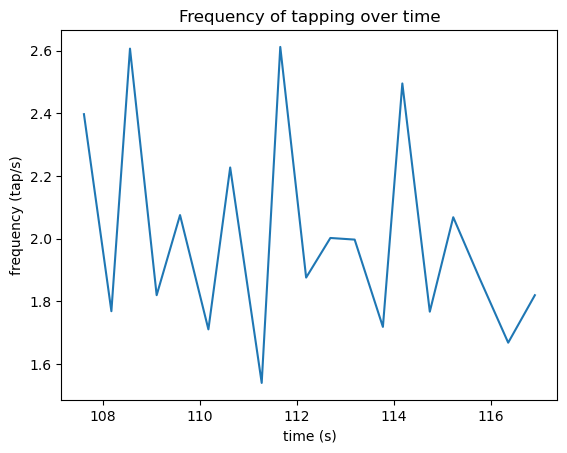

In [39]:
freq_per_tap_FT1 = freq_per_tap(
    FT1_VR,
    min_FT1_idx_VR
    )

[1.8768768768768458, 1.764913519237576, 1.9394879751745304, 0.9839614287119934, 2.7307482250137127, 1.665833749791759, 1.936108422071607, 1.6675004168751477, 2.069108214359551, 1.5410695022345564, 3.3311125916057116, 3.0012004801920313, 1.8175209014904015, 1.3964530093562126, 1.714971702966896, 1.3042911177775118, 3.342245989304665, 2.3068050749711153]
[127.6516, 128.2182, 128.7338, 129.7501, 130.1163, 130.7166, 131.2331, 131.8328, 132.3161, 132.965, 133.2652, 133.5984, 134.1486, 134.8647, 135.4478, 136.2145, 136.5137, 136.9472]


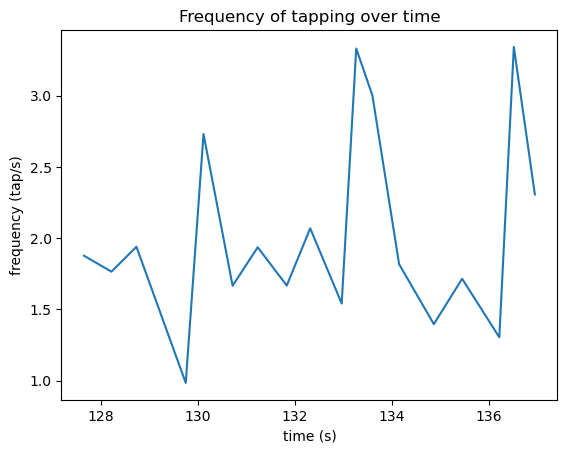

In [40]:
freq_per_tap_FT2 = freq_per_tap(
    FT2_VR,
    min_FT2_idx_VR
    )

[2.2207417277370713, 1.3655605626109875, 2.066115702479301, 1.6223231667748248, 1.6669444907484832, 1.3642564802182735, 1.9353590090961335, 1.4637002341920389, 1.1781338360037938, 1.3939224979091205, 1.5015015015014446, 1.5019525382998118, 1.578033769922665, 1.8765246762995507, 1.8221574344023326, 2.6089225150011703, 2.395783421178803, 1.6700066800266886]
[147.7426, 148.4749, 148.9589, 149.5753, 150.1752, 150.9082, 151.4249, 152.1081, 152.9569, 153.6743, 154.3403, 155.0061, 155.6398, 156.1727, 156.7215, 157.1048, 157.5222, 158.121]


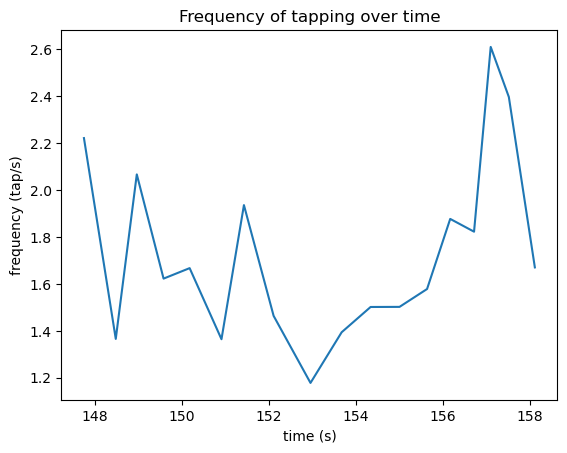

In [41]:
freq_per_tap_FT3 = freq_per_tap(
    FT3_VR,
    min_FT3_idx_VR
    )

### Spectral Power

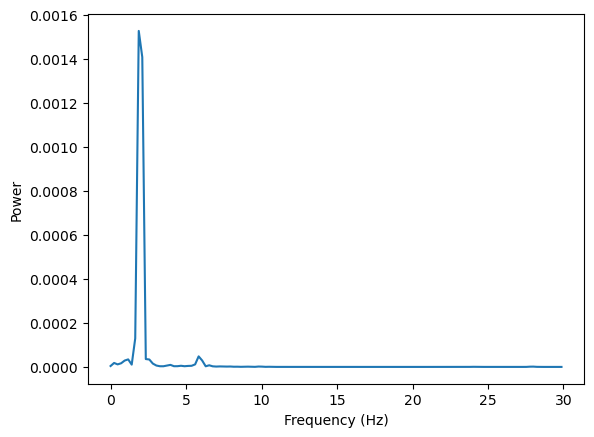

In [42]:
time_diffs = np.diff(FT1_VR['program_time']) 

sfreq = 1 / np.mean(time_diffs)

# # plot how stable the frequency (aka time-between-samples) is
# plt.plot(time_diffs)
# plt.show()

# time-spectral-decomposition
from scipy import signal
f, psd = signal.welch(
    FT1_VR['distance'],  # data_array can be raw trace of data point, or be the distance between indextip and thumbtip
    fs=sfreq,
)
plt.plot(f, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show()